# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

Develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.).

# STEP #2: IMPORTING DATA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from summarytools import dfSummary
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
sns.set_theme()

In [2]:
df_customer = pd.read_csv("dataset/Bank_Customer_retirement.csv")

In [35]:
df_customer.keys()

Index(['Age', '401K Savings', 'Retire'], dtype='object')

In [3]:
df_customer.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [4]:
df_customer.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [5]:
df_customer.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [6]:
df_customer.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [7]:
skim(df_customer)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 500    │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Customer ID     │   0 │     0 │    249.5 │   144.5 │   0 │   124.8 │   249.5 │   374.2 │      499 │ ▇▇▇▇▇▇ │  │
│ │ Age             │   0 │     0 │    46.76 │    7.79 │  25 │    41.3 │    46.7 │   52.32 │       70 │ ▁▅▇▇▃▁ │  │
│ │ 401K Savings    │   0 │     0 │   535000 │  187700 │  10 │  382600 │  534500 │  680700 │  1000000 │  ▅▇▇▇▁ │  │
│ │ Retire          │   0 │     0 │      0.5 │  0.5005 │   0 │       0 │     0.5 │       1 │        1 │ ▇    ▇ │  │
│ └─────────────────┴─────┴───────┴──────────┴─────────┴─────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
dfSummary(df_customer)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer ID[int64],Mean (sd) : 249.5 (144.5)min < med < max:0.0 < 249.5 < 499.0IQR (CV) : 249.5 (1.7),500 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAYhJREFUeJzt10GK2mAAhuE/Mh1sFUVk9AC9gUsP0cP2EJ7ARTdduRMkREyntNiUSAuzkBnSTb/F86zz/WTxkp9UXdcVSDH63y8ALz2UV1RV9b6U8lj+PfZftrZ3/Oi67nlQkH2My+Xy02w2W5SBrtfru7ZtP06n06+j0einre1L5/O5rqrq870oX/tCPvYxbrfb5/l8/r0McDgcFvv9/mmz2XxZr9e1re1fTdOMd7vd4nQ69TfvoCBv+hhXq9W3MkBd1/1VXyaTia3tPbf9PX5qiCJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIny8NYDTdOMhx56uVxum7Ztx8fj8YOtbfnjrZ5+A3FcOdojPvu1AAAAAElFTkSuQmCC"">",0(0.0%)
2,Age[float64],Mean (sd) : 46.8 (7.8)min < med < max:25.0 < 46.7 < 70.0IQR (CV) : 11.0 (6.0),500 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAlJJREFUeJzt282K2lAAhuGTxhmioYoIuvMGCi5cehG92F5CF16BW1duJCghYmbSxJiStuDYRUv+8DN5n80wi4NZvETPn5VlmQFUfHr0AwAf9e7+6zjLsvrGmNeSw+Msy95rfqTOIcgPMU4mk6/D4XBcZvzpdPIty/pGlNUQ5M1rHuNqtXofjUZRkYFBEDjr9Xp8PB7ztytBVkCQf8ljnE6nbyWG5l/3qIhJDaQQJKQQJKTwG7ImaZq+GGOGlmWVGc6S0R8EWYMwDF+SJFnM53Pbtu1CM/QcS0Y3BFmDOI57juMMlstlNJvN/CJjWTK6R5A1cl2XJaOKmNRACkFCSuu+sisckBher9d8powHalWQVQ5IJEnipGn6JYqi78aYMr8DUYNWBVnlgMRutxtvNpvB5XKxm3s8dC3I0gckfN9npiuASQ2ktPIN+WzYdrwhyAdj2/EeQT4Y2473CFIE246/MamBFIKEFIKEFIKEFIKEFMlZNid2uksuSE7sdJtckJzY6TbFIH/hxE43MamBFIKEFIKEFIKEFIKEFIKEFIKEFIKEFIKEFNmdGnTzxiJBPrGwhTcWCfKJxS28sUiQLeC26MYikxpIIUhIIUhIIUhIIUhIIUhIaWzZh6uskAmSq6zPIRXcdmzqDclVVnGh6LZjozs1XGXVFYtuO7J12HGu2LYjs2xIIUhIIUhIIUhI+eekhsVtyATJ4jYesaje+9/i9mKxMP1+/0eRTzscDs52ux0EQeB6nhcXGXs+n538bxiGjud5A8YaubH7/f5zU4vqPwF8npH8xLVgTwAAAABJRU5ErkJggg=="">",0(0.0%)
3,401K Savings[float64],Mean (sd) : 534984.5 (187675.8)min < med < max:10.0 < 534513.0 < 1000000.0IQR (CV) : 298043.7 (2.9),500 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAltJREFUeJzt3c+K2kAAx/FJ4y6zBhL8g958gYUeBC8+QI992D5CDx727Bt4EyUophsSY0rAQ9vDQrIN/jL5fi6ysMMG8lUnQ3bilWVpABVfHn0AwJ8Gf/2Eh/A878UY89xweFaW5btxhHNBdu3kVsc7mUy+h2E4ajL+fD7Hnuf9cCVKp4Ls6Ml9ro53vV6/R1GU1hl4Op3sZrMZHY/H6g1IkII6e3Kr453NZr8aDK2+EZzhWpAPO7mfmCqEt9vtqenfdY2TQTZVFEUVRuh5Xt2hdjwef4uiKKg7MM9zWxTFa5qmP40xTd5ETiHIuyRJnvI8/7pYLHzf99O6URljXler1dt0Oj3XGbvb7Ubb7XZ4vV792gftIIK8y7JsYK0dLpfLdD6fx02istbmdacKcRw7NQf8LIL8RxAEaZeiKppPMyTXMAmyp9MM1TVMguzpNOMkuoZJkD2dZtzJzV+5uQJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSJP8vm63t+mvg0i64bG3XfQOXdsFla7vuUwyy8S64bG3XfVzUQApBQgpBQgpBQgpBQgpBQgpBQorsOiT6+QQHguypRPQJDgTZU5noExwIsucCsSc4cFEDKQQJKa19ZXOTLWSC5CZb9xUtLRm19QnJTbYOS1pcMmr1KpubbN2UtbhkxLIPpJaMuMqGFIKEFIKElA/nkKwlQibI/7GWeDgc3uqOvVwutnpNksTu9/shY41TY6ur7I9+4TeYs4erHqpMOQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Retire[int64],1. 02. 1,250 (50.0%)250 (50.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAThJREFUeJzt209Kw0AYh+GJBNFNSin0MD2Eh/UQuU2RZmHFTWQ8QWcKvxJ9nkVXDRmGl/QP8w3ruhZIGEopr6WU58jd/pbvdV2vj17EloyHw+Ftmqb9oxeyNcuyfAzD8C642401tNPpdN3tdl8N1/1rl8vlZZ7n/fl8rp8IYrvRWF9qaMfj8fPWi/hVv37Q4KnlzXAPsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIje56tHgbM3XL77FefsR5vrqdOHQZsU/etziE8eh1bYuCln4GXRoNRPlI82fp5sjUyytfJKF87o3wdjPL1McrXz6/3Rv7UJUZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgxytfBfvUxytfJKF87Ay/9DLyUNj9+kGrf4SmphgAAAABJRU

In [9]:
df_customer.drop(labels={'Customer ID'}, axis = 1, inplace= True)

# STEP #3: VISUALIZING THE DATA

<Axes: xlabel='Retire', ylabel='count'>

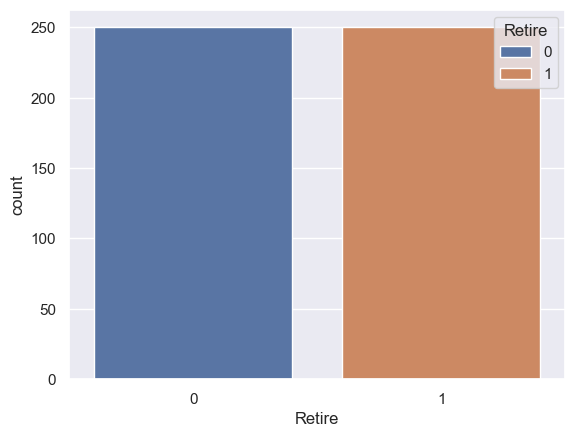

In [10]:
# Balanced target variable

sns.countplot(data = df_customer, x='Retire', hue='Retire')

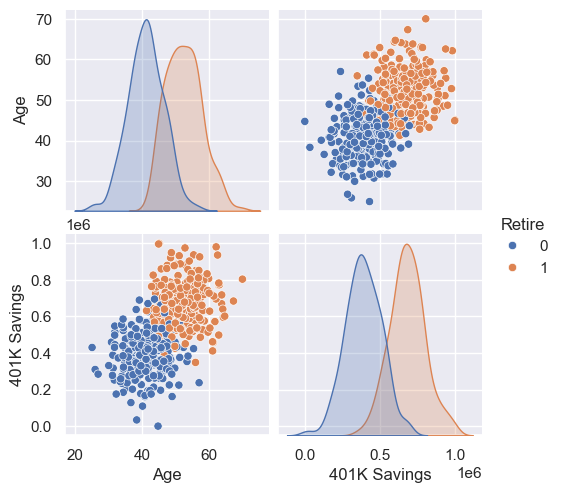

In [11]:
sns.pairplot(data = df_customer, vars=['Age', '401K Savings'], hue = 'Retire')

<Axes: ylabel='count'>

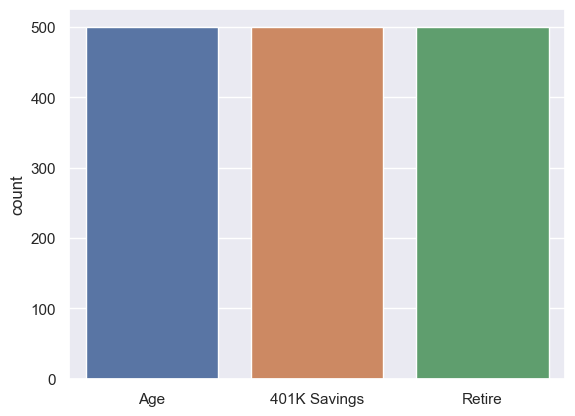

In [12]:
# We have no missing data

sns.countplot(df_customer.isna())

# Observations:
* The higher the more likely the person will retire and age and retire has a 0.73 correlation which makes sense
* Age and 401K savings are not that strong in their correlation
* 401K SAvings and Retire have a strong correlation showing that people who retire do have a 401K Savings account.

[Text(0.5, 1.0, 'Correlation')]

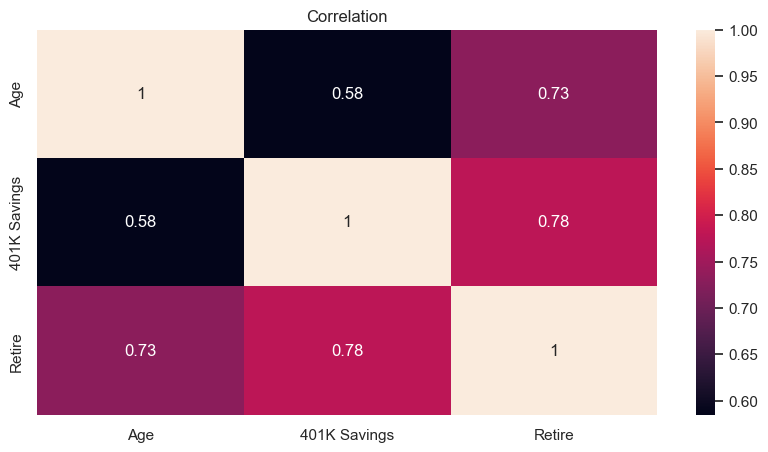

In [13]:
fig, ax = plt.subplots(figsize =(10, 5))
sns.heatmap(data = df_customer.corr(),
            annot=True)
ax.set(title = 'Correlation')

# STEP #4: MODEL TRAINING 

In [19]:
# Initilizing X and y

X = df_customer.drop(labels={'Retire'}, axis = 1)
y = df_customer['Retire']


In [36]:
X.head()

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723


In [21]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Retire, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
svc_model = SVC()

In [24]:
svc_model.fit(X_train, y_train)

SVC()

# STEP #5: EVALUATING THE MODEL

In [25]:
# Making the prediction using the test data with our SVM model

initial_predicted_y = svc_model.predict(X_test)

In [26]:
# Classification report to see how well our model is doing

print(classification_report(y_pred=initial_predicted_y, y_true=y_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.96      0.82      0.88        56

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100



In [27]:
# Confusion matrix

cm_initial = confusion_matrix(y_pred=initial_predicted_y, y_true=y_test)

[Text(0.5, 1.0, 'Confusion Matrix visualised')]

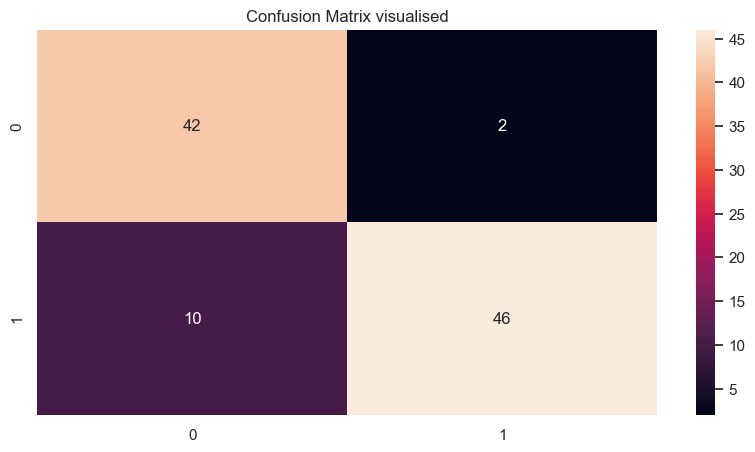

In [28]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(data = cm_initial, annot= True)
ax.set(title="Confusion Matrix visualised")

# STEP #6: IMPROVING THE MODEL.
## What can we do to further improve the model than it already is?

In [29]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose = 4)

In [30]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=4))
])

pipeline.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.990 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.990 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100],
                                          'gamma': [1, 0.1, 0.01, 0.001],
                                          'kernel': ['rbf']},
                              verbose=4))])

In [31]:
pipeline_predicted_y = pipeline.predict(X_test)

In [32]:
print(classification_report(y_pred=pipeline_predicted_y, y_true=y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        56

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<Axes: >

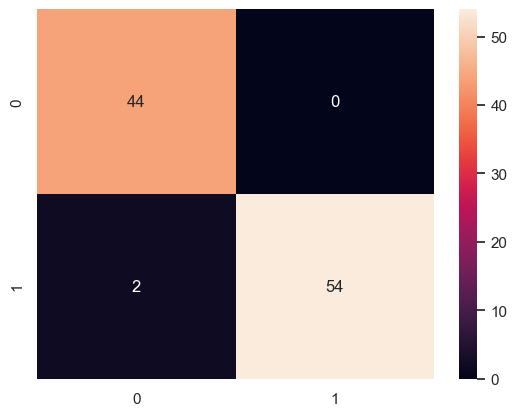

In [33]:
pipeline_cm = confusion_matrix(y_pred=pipeline_predicted_y, y_true=y_test)
sns.heatmap(data = pipeline_cm, annot=True)